In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Panel A <br>
Data required: oncogene allele matrix

In [2]:
allele_matrix = pd.read_csv(PATH_TO_DATA + 'data/oncogenes_allele_matrix.csv', index_col=0)
all_hlas = list(allele_matrix.columns)

In [3]:
df = pd.DataFrame({'hla_gene': ['A', 'B', 'C'],
                   'total': [len([x for x in all_hlas if x[4] == 'A']),
                             len([x for x in all_hlas if x[4] == 'B']),
                             len([x for x in all_hlas if x[4] == 'C'])]})

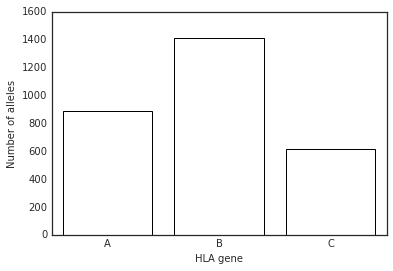

In [4]:
sns.barplot(x='hla_gene', y='total', data=df, color='white')
plt.ylabel('Number of alleles')
plt.xlabel('HLA gene')

## Panel B <br>
Data required: oncogene allele matrix

In [5]:
df = pd.DataFrame({'peptide_type': ['Tumor Suppressor Genes', 'Oncogenes', 'Common Variation', 'Bacterial', 'Viral','Random'],
                   'total': [len(pd.read_csv(PATH_TO_DATA + 'data/tsgenes_allele_matrix.csv', index_col=0)), 
                             len(pd.read_csv(PATH_TO_DATA + 'data/oncogenes_allele_matrix.csv', index_col=0)),
                             len(pd.read_csv(PATH_TO_DATA + 'data/common_allele_matrix.csv', index_col=0)), 
                             len(pd.read_csv(PATH_TO_DATA + 'data/bacterial_allele_matrix.csv', index_col=0)), 
                             len(pd.read_csv(PATH_TO_DATA + 'data/viral_allele_matrix.csv', index_col=0)), 
                             len(pd.read_csv(PATH_TO_DATA + 'data/random_allele_matrix.csv', index_col=0))]})

In [6]:
df['log_total'] = np.log10(df.total)

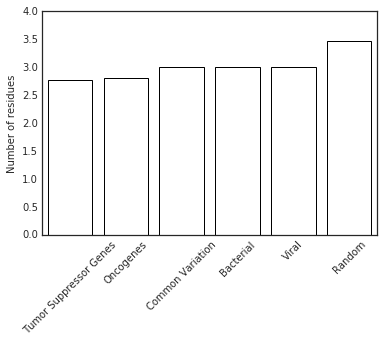

In [7]:
sns.barplot(x='peptide_type', y='log_total', data=df, color='white')
plt.xticks(rotation=45)
plt.ylim(0, 4)
plt.ylabel('Number of residues')
plt.xlabel('')

## Panel C <br>
Data required: 

In [8]:
categories = ['oncogenes', 'tsgenes', 'random', 'common', 'viral', 'bacterial']

In [9]:
mutation_counts = pd.DataFrame(pd.read_csv(PATH_TO_DATA + 'data/patient_mutations.cancer.PHBR.csv', index_col=0).sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
restricted_space = list(mutation_counts[mutation_counts['count'] > 10].mutation)

In [10]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [11]:
value_types_all = []
for category in categories:
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv(PATH_TO_DATA + 'data/{0}_allele_matrix.csv'.format(category), index_col=0)
        df = df.ix[[x for x in list(df.index) if x in restricted_space]]
        print category, len(df)
        values = get_values_from_df(df)
        value_types_all.append(values)
    else:
        df = pd.read_csv(PATH_TO_DATA + 'data/{0}_allele_matrix.csv'.format(category), index_col=0)
        df = df
        print category, len(df)
        values = get_values_from_df(df)
        value_types_all.append(values)

oncogenes 76
tsgenes 70
random 3000
common 1000
viral 1000
bacterial 1000


In [12]:
cancer_num = len(value_types_all[0]) + len(value_types_all[1])
cancer_res_num = cancer_num/2924

In [13]:
random_df = pd.read_csv(PATH_TO_DATA + 'data/random_allele_matrix.csv', index_col=0)

In [14]:
random_draws = []
for i in range(1000):
    if i % 100 == 0:
        print i
    sample = get_values_from_df(random_df.sample(cancer_res_num, axis=0))
    greater_than_all = len(filter(lambda a: a < 0.5, sample))
    random_draws.append(float(greater_than_all)/cancer_num)

0
100
200
300
400
500
600
700
800
900


This plot is randomly generated, so expect there to be some variation each time.

P-value: 0.004


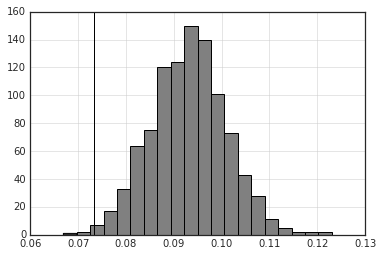

In [15]:
actual = len(filter(lambda a: a < 0.5, value_types_all[0] + value_types_all[1]))/float(cancer_num)
print 'P-value:', len([x for x in random_draws if x < actual])/float(len(random_draws))
pd.Series(random_draws).hist(bins=20, color='grey')
plt.axvline(actual, c='k')